In [56]:
# Import necessary modules for process mining and visualization using pm4py
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization


In [57]:
# Load an event log in XES format using the xes_importer module from pm4py
log = xes_importer.apply('process_mining_log.xes')

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [58]:
# Load a CSV file as a pandas DataFrame, convert timestamp columns to datetime format, and sort the DataFrame by timestamp
df = pd.read_csv('process_mining.csv')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

# Convert the pandas DataFrame to a pm4py log object using log_converter module
log = log_converter.apply(df)

In [59]:
# Sort a pandas DataFrame by two columns 'case:concept:name' and 'time:timestamp', and reset the index
df.sort_values(['case:concept:name', 'time:timestamp'], inplace=True)

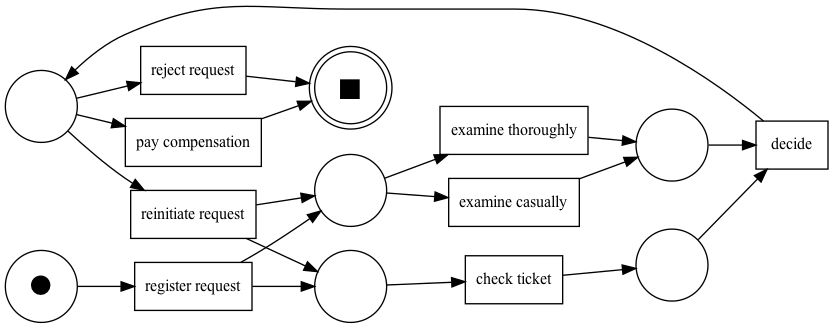

In [60]:
# Apply the alpha miner algorithm to the log to discover a Petri net
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualize the Petri net using pm4py's Petri net visualizer module
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

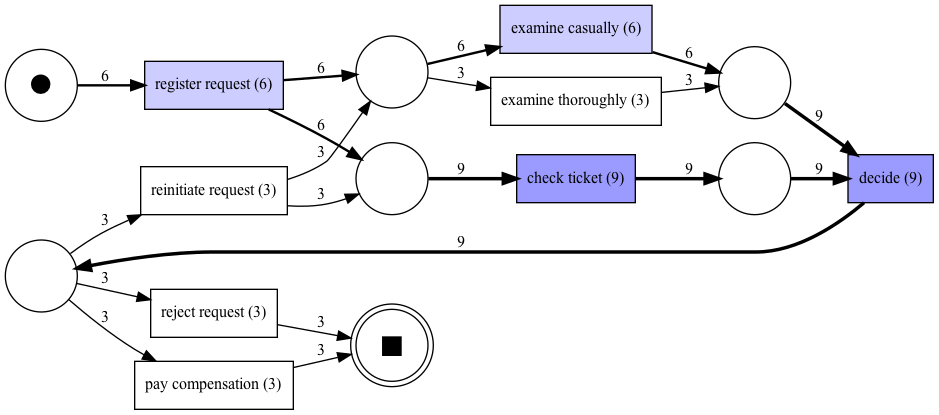

In [61]:
# Set the visualization format to 'png' and create a dictionary of parameters for the visualization
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

# Apply the frequency variant of the Petri net visualizer to the discovered Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# View the Petri net visualization
pn_visualizer.view(gviz)